# Proyecto 1: Descargando datos de la web
Curso Ingeniería de Características


**Estephania Pivac Alcaraz**

---

**Problema de interés:**
Estudar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras.

## 1. Descargando los datos

Comenzamos cargando las bibliotecas necesarias.

In [148]:
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos
import numpy as np

Creamos los subdirectorios para guardar los datos de manera ordenada.

In [149]:
# pwd
print(os.getcwd())

#  Estos son los datos que vamos a descargar y donde vamos a guardarlos
accidentes_transito_2021_url = "https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
accidentes_transito_2021_archivo = "accidentes_transito_2021.zip"

conservacion_carreteras_2019_url = "https://data.sct.gob.mx/datos/datos/abiertos/21101DGCCProgramaNacionalC.csv"
conservacion_carreteras_2019_archivo = "conservacion_carreteras_2019.csv"
subdir = "./data/" 

/content


Revisamos si ya existen los subdirectorios. Si no es así los creamos.

Enseguida, abrimos las url de los archivos, extraemos contenidos de los zip y los guardamos.

In [150]:
# Revisamos si el archivo existe. Si no existe, se procede a crearlo.
if not os.path.exists(accidentes_transito_2021_archivo):
  # Revisamos si el directorio existe. Si no es así procedemos a crearlo.
  if not os.path.exists(subdir):
    #Creamos el directorio 
    os.makedirs(subdir)
  # Abrimos la url y guardamos el objeto en mortalidad_2020_archivo
  urllib.request.urlretrieve(accidentes_transito_2021_url, subdir + accidentes_transito_2021_archivo)  
  # Extraemos el contenido del zip y lo guardamos.
  with zipfile.ZipFile(subdir + accidentes_transito_2021_archivo, "r") as zip_ref:
    zip_ref.extractall(subdir)

if not os.path.exists(conservacion_carreteras_2019_archivo):
    urllib.request.urlretrieve(conservacion_carreteras_2019_url, subdir + conservacion_carreteras_2019_archivo) 

Creamos un archivo tipo txt, con la información de las bases de datos y las fuentes de donde obtuvimos la información.

In [151]:
with open(subdir + "info.txt", 'w') as f:
  f.write("Archivos sobre accidentes de tránsito \n")
  info = """
  accidentes_transito_2021: Esta estadística mide la siniestralidad del 
  transporte a nivel nacional, y se genera a partir del acopio y procesamiento 
  de los datos alusivos a los accidentes ocurren en zonas no federales. Esta 
  información contribuyó a la planeación, organización del transporte y 
  la prevención de accidentes.
  Esta base de datos se obtuvo del sitio del INEGI:
  https://www.inegi.org.mx/programas/accidentes/#Datos_abiertos
  
  El objetivo principal de esta base de datos es producir información anual 
  sobre la siniestralidad del transporte terrestre a nivel nacional, entidad 
  federativa y municipio, mediante el acopio y procesamiento de datos alusivos 
  a los accidentes ocurridos en zonas no federales, contribuyendo con ello a 
  la planeación y organización del transporte.

  Se dispone de la estadística desde 1997 (la difusión se realiza siete meses 
  posteriores al término del año de referencia de la información).

  Cobertura temática
  Características de los accidentes de tránsito ocurridos en zonas no federales, 
  tales como:

      Hora de ocurrencia del accidente.
      Fecha de ocurrencia del accidente.
      Zona de ocurrencia del accidente.
      Clase de accidente.
      Tipo de accidente.
      Tipo de vehículo involucrado.
      Causa determinante o presunta del accidente.
      Superficie de rodamiento.
      Tipo de víctimas.
      Clase de víctima.
      Clasificador utilizado
      Estadísticas de transporte por carretera, del Instituto Interamericano de 
      Estadística.


  conservacion_carreteras_2019_archivo: Esta base de datos contiene información
  sobre el avance físico-financiero de obras públicas en tramos y puentes en 
  carreteras federales libres de peaje, del Programa Nacional de Conservación de 
  Carreteras. 

  Los datos se obtuvieron de datos abiertos del Gobierno de México de la 
  Secretaría de Comunicación y Transporte con fechas 15 de octubre de 2022, 
  estos datos se actualizan de manera irregular. La última actualización se 
  llevó a cabo en 2019-06-28. 

  Esta base de datos se obtuvo del sitio de Gobierno de México:
  https://datos.gob.mx/busca/dataset/infraestructura-carretera/resource/e75840ff-4b48-48b7-a302-7ce8546576a6

  """ 
  f.write(info + '\n')
  f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
  f.write("Desde: " + accidentes_transito_2021_url + "\n")
  f.write("Nombre: " + accidentes_transito_2021_archivo + "\n")
  f.write("Agregados conservación de carreteras 2019 desde: " + conservacion_carreteras_2019_url + "\n")
  f.write("Nombre: " + conservacion_carreteras_2019_archivo + "\n")

Se pretende realizar un estudio donde podamos ver cómo han evolucionado los accidentes viales, en qué estados de la República son más comunes. También resulta de interés saber cual es el efecto que ha tenido toda la inversión realizada en el programa de conservación de carreteras, y cómo ha contribuido a que Mexico cuente con carreteras más seguras.

## Accidentes de tránsito terrestre en zonas urbanas y suburbanas

Exploremos las primeras bases de datos.

In [152]:
df_accidentes_2021 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2021.csv", index_col=False)
df_accidentes = df_accidentes_2021

# Creamos data frames de los accidentes de tránsito desde 2017
df_accidentes_2020 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2020.csv", index_col=False)
df_accidentes_2019 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2019.csv", index_col=False)
df_accidentes_2018 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2018.csv", index_col=False)
df_accidentes_2017 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2017.csv", index_col=False)

# Agregamos únicamente los datos del estado de Sonora
df_accidentes = df_accidentes.append(df_accidentes_2020)
df_accidentes = df_accidentes.append(df_accidentes_2019)
df_accidentes = df_accidentes.append(df_accidentes_2018)
df_accidentes = df_accidentes.append(df_accidentes_2017)

df_accidentes = df_accidentes.reset_index(drop = True)

In [153]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802672 entries, 0 to 1802671
Data columns (total 45 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   COBERTURA     object
 1   ID_ENTIDAD    int64 
 2   ID_MUNICIPIO  int64 
 3   ANIO          int64 
 4   MES           int64 
 5   ID_HORA       int64 
 6   ID_MINUTO     int64 
 7   ID_DIA        int64 
 8   DIASEMANA     object
 9   URBANA        object
 10  SUBURBANA     object
 11  TIPACCID      object
 12  AUTOMOVIL     int64 
 13  CAMPASAJ      int64 
 14  MICROBUS      int64 
 15  PASCAMION     int64 
 16  OMNIBUS       int64 
 17  TRANVIA       int64 
 18  CAMIONETA     int64 
 19  CAMION        int64 
 20  TRACTOR       int64 
 21  FERROCARRI    int64 
 22  MOTOCICLET    int64 
 23  BICICLETA     int64 
 24  OTROVEHIC     int64 
 25  CAUSAACCI     object
 26  CAPAROD       object
 27  SEXO          object
 28  ALIENTO       object
 29  CINTURON      object
 30  ID_EDAD       int64 
 31  CONDMUERTO    int64 
 32

### 1. Filtramos características e instancias

Filtraremos nuestra base de datos para quedarnos únicamente con la información relevante a nuestro problema central.

1. Como solo nos interesan los accidentes en carretera, nos quedaremos con los accidentes de tránsito en area "Suburbana"

In [154]:
df_accidentes['SUBURBANA'].value_counts()

Sin accidente en esta zona        1665900
Accidente en carretera estatal      91640
Accidente en camino rural           23934
Accidentes en otro camino           21198
Name: SUBURBANA, dtype: int64

In [155]:
df_accidentes['URBANA'].value_counts()

Accidente en intersección       1500391
Sin accidente en esta zona       201552
Accidente en no intersección     100729
Name: URBANA, dtype: int64

In [156]:
# Solo nos quedamos con los accidentes en área suburbana "Accidente en camino estatal"
df_accidentes = df_accidentes[df_accidentes['SUBURBANA'] == 'Accidente en carretera estatal']

# Eliminamos las columnas que ya no nos interesan
df_accidentes.pop('URBANA')
df_accidentes.pop('SUBURBANA')
df_accidentes

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
33,Municipal,1,1,2021,1,20,45,3,Domingo,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
47,Municipal,1,1,2021,1,20,1,4,lunes,Salida del camino,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
153,Municipal,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
209,Municipal,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
220,Municipal,1,1,2021,1,3,0,26,Martes,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,Municipal,32,48,2017,12,14,45,4,Lunes,Salida del camino,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802601,Municipal,32,51,2017,12,2,50,24,Domingo,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802602,Municipal,32,51,2017,12,15,45,26,Martes,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802603,Municipal,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas


2. Eliminamos las características sobre las personas involucradas en el accidente, ya que solo nos interesa saber cuántos accidentes hubieron en el estado y el tipo de accidente en general.

In [157]:
drop_col = ['SEXO', 'CINTURON', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'COBERTURA', 'ESTATUS']
for x in drop_col:
  df_accidentes.pop(x)
df_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,...,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,ALIENTO,ID_EDAD,CLASACC
33,1,1,2021,1,20,45,3,Domingo,Salida del camino,1,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,30,Sólo daños
47,1,1,2021,1,20,1,4,lunes,Salida del camino,1,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,17,No fatal
153,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,2,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,54,Sólo daños
209,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,2,...,0,0,0,0,0,Conductor,Pavimentada,Sí,30,Sólo daños
220,1,1,2021,1,3,0,26,Martes,Salida del camino,1,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,0,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,48,2017,12,14,45,4,Lunes,Salida del camino,1,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,0,Fatal
1802601,32,51,2017,12,2,50,24,Domingo,Volcadura,0,...,0,0,0,0,0,Conductor,Pavimentada,Sí,46,Fatal
1802602,32,51,2017,12,15,45,26,Martes,Volcadura,0,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,0,Fatal
1802603,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,0,...,0,0,0,0,0,Conductor,Pavimentada,Se ignora,0,No fatal


3. Como los tipos de vehículos involucrados en cada accidente se sale de nuestro propósito central del problema, también nos deshacemos de estas columnas: "AUTOMOVIL" hasta "OTROVEHICULO".

In [158]:
# Eliminamos las columnas con información de los tipos de vehiculos involucrados:
drop_col = ['AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC']
for x in drop_col:
  df_accidentes.pop(x)
df_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,CAUSAACCI,CAPAROD,ALIENTO,ID_EDAD,CLASACC
33,1,1,2021,1,20,45,3,Domingo,Salida del camino,Conductor,Pavimentada,Se ignora,30,Sólo daños
47,1,1,2021,1,20,1,4,lunes,Salida del camino,Conductor,Pavimentada,Se ignora,17,No fatal
153,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,Se ignora,54,Sólo daños
209,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,Sí,30,Sólo daños
220,1,1,2021,1,3,0,26,Martes,Salida del camino,Conductor,Pavimentada,Se ignora,0,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,48,2017,12,14,45,4,Lunes,Salida del camino,Conductor,Pavimentada,Se ignora,0,Fatal
1802601,32,51,2017,12,2,50,24,Domingo,Volcadura,Conductor,Pavimentada,Sí,46,Fatal
1802602,32,51,2017,12,15,45,26,Martes,Volcadura,Conductor,Pavimentada,Se ignora,0,Fatal
1802603,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,Conductor,Pavimentada,Se ignora,0,No fatal


### 2. Variables cualitativas

1. Dado que nos interesa estudiar la relación de accidentes y condiciones de carretera, eliminaremos la información de aquellas instancias en las cuales el conductor se encontraba alcoholizado. Además, una vez realizado este filtro eliminaremos esta columna ya que no representa más información relevante al problema central.

In [159]:
df_accidentes['ALIENTO'].value_counts()

No           47274
Se ignora    38290
Sí            6076
Name: ALIENTO, dtype: int64

In [160]:
# Solo nos quedamos con los accidentes en los que el conductor no se encontraba alcoholizado o se desconoce esta información.
df_accidentes = df_accidentes[df_accidentes['ALIENTO'] != 'Sí']
df_accidentes.pop('ALIENTO')
df_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,CAUSAACCI,CAPAROD,ID_EDAD,CLASACC
33,1,1,2021,1,20,45,3,Domingo,Salida del camino,Conductor,Pavimentada,30,Sólo daños
47,1,1,2021,1,20,1,4,lunes,Salida del camino,Conductor,Pavimentada,17,No fatal
153,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,54,Sólo daños
220,1,1,2021,1,3,0,26,Martes,Salida del camino,Conductor,Pavimentada,0,Sólo daños
236,1,1,2021,1,17,17,28,Jueves,Colisión con vehículo automotor,Conductor,Pavimentada,44,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802594,32,42,2017,12,0,37,31,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,0,Sólo daños
1802595,32,48,2017,12,14,45,4,Lunes,Salida del camino,Conductor,Pavimentada,0,Fatal
1802602,32,51,2017,12,15,45,26,Martes,Volcadura,Conductor,Pavimentada,0,Fatal
1802603,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,Conductor,Pavimentada,0,No fatal


2. Exploramos las características para decidir cuales instancias nos interesan de acuerdo al problema central.

In [161]:
df_accidentes['CAUSAACCI'].value_counts()

Conductor                    78812
Falla del vehículo            2529
Mala condición del camino     2347
Otra                          1303
Peatón o pasajero              573
Name: CAUSAACCI, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


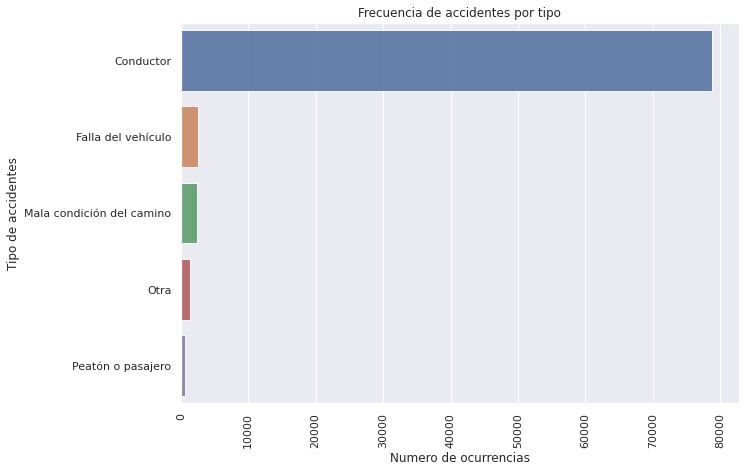

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_acc_count = df_accidentes['CAUSAACCI'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(tipo_acc_count.values, tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De causas de accidentes no nos interesan aquellas que son causadas por falla del vehículo ni por peatones o pasajeros.

In [163]:
# Eliminamos los accidentes registrados causados por falla del vehículo o peatón o pasajero.
df_accidentes = df_accidentes[df_accidentes['CAUSAACCI'] != 'Falla del vehículo']
df_accidentes = df_accidentes[df_accidentes['CAUSAACCI'] != 'Peatón o pasajero']

De tipos de accidentes no nos interesan los incendios ni caída de pasajero. Por lo que nos deshacemos de estas instancias.

In [164]:
df_accidentes['TIPACCID'].value_counts()

Colisión con vehículo automotor          32656
Salida del camino                        14617
Volcadura                                11550
Colisión con objeto fijo                  8957
Colisión con motocicleta                  8577
Colisión con animal                       1963
Colisión con peatón (atropellamiento)     1425
Otro                                      1213
Colisión con ciclista                      726
Caída de pasajero                          486
Colisión con ferrocarril                   164
Incendio                                   128
Name: TIPACCID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


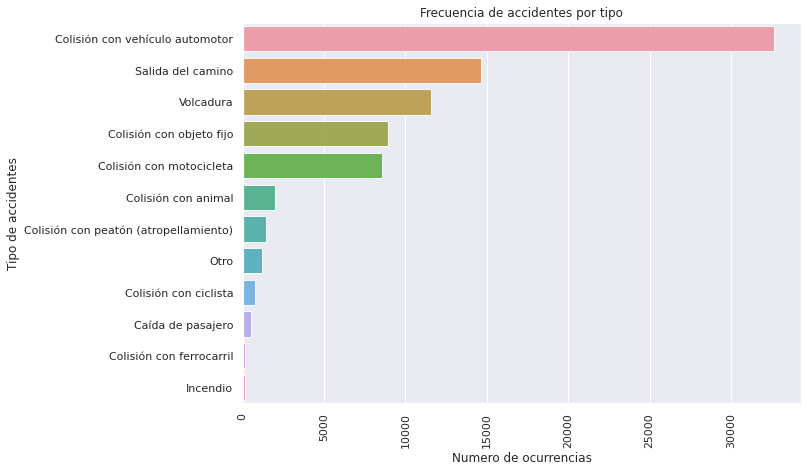

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_acc_count = df_accidentes['TIPACCID'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(tipo_acc_count.values, tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [166]:
# Solo nos quedamos con los accidentes en área suburbana "Accidente en camino estatal"
df_accidentes = df_accidentes[df_accidentes['TIPACCID'] != 'Incendio']
df_accidentes = df_accidentes[df_accidentes['TIPACCID'] != 'Caída de pasajero']

#df_accidentes

3. Debido a la especificidad que manejaremos (un estudio por estado), nos deshacemos de la columna que especifica el municipio.

In [167]:
df_accidentes.pop('ID_MUNICIPIO')
df_accidentes

,ID_ENTIDAD,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,CAUSAACCI,CAPAROD,ID_EDAD,CLASACC
33,1,2021,1,20,45,3,Domingo,Salida del camino,Conductor,Pavimentada,30,Sólo daños
47,1,2021,1,20,1,4,lunes,Salida del camino,Conductor,Pavimentada,17,No fatal
153,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,54,Sólo daños
220,1,2021,1,3,0,26,Martes,Salida del camino,Conductor,Pavimentada,0,Sólo daños
236,1,2021,1,17,17,28,Jueves,Colisión con vehículo automotor,Conductor,Pavimentada,44,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...
1802594,32,2017,12,0,37,31,Domingo,Colisión con vehículo automotor,Conductor,Pavimentada,0,Sólo daños
1802595,32,2017,12,14,45,4,Lunes,Salida del camino,Conductor,Pavimentada,0,Fatal
1802602,32,2017,12,15,45,26,Martes,Volcadura,Conductor,Pavimentada,0,Fatal
1802603,32,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,Conductor,Pavimentada,0,No fatal


### 3. Variables de tipo fecha

Convertimos fechas a formato adecuado.

In [21]:
df_date = {
    'YEAR' : df_accidentes.ANIO,
    'MONTH' : df_accidentes.MES,
    'DAY': df_accidentes.ID_DIA
}
df_accidentes['FECHA'] = pd.to_datetime(df_date, format='%m/%d/%Y', errors='coerce')
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81848 entries, 33 to 1802605
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_ENTIDAD  81848 non-null  int64         
 1   ANIO        81848 non-null  int64         
 2   MES         81848 non-null  int64         
 3   ID_HORA     81848 non-null  int64         
 4   ID_MINUTO   81848 non-null  int64         
 5   ID_DIA      81848 non-null  int64         
 6   DIASEMANA   81848 non-null  object        
 7   TIPACCID    81848 non-null  object        
 8   CAUSAACCI   81848 non-null  object        
 9   CAPAROD     81848 non-null  object        
 10  ID_EDAD     81848 non-null  int64         
 11  CLASACC     81848 non-null  object        
 12  FECHA       81848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 8.7+ MB


Debido a que la base de datos que utilizaremos para relacionar la conservación de carreteras no tiene columna de tipo fecha, asociaremos los valores por estado. Por esta razón no utilizaremos esta columna de fecha. Sin embargo, podemos tratar al año como un tipo de dato ordinal. 

Nos desharemos de las columnas de fecha: MES, ID_HORA, ID_MINUTO, ID_DIA, DIASEMANA

In [22]:
drop_col = ['MES', 'ID_HORA', 'ID_MINUTO', 'ID_DIA', 'DIASEMANA']
for x in drop_col:
  df_accidentes.pop(x)
df_accidentes

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,ID_EDAD,CLASACC,FECHA
33,1,2021,Salida del camino,Conductor,Pavimentada,30,Sólo daños,2021-01-03
47,1,2021,Salida del camino,Conductor,Pavimentada,17,No fatal,2021-01-04
153,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,54,Sólo daños,2021-01-17
220,1,2021,Salida del camino,Conductor,Pavimentada,0,Sólo daños,2021-01-26
236,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,44,Sólo daños,2021-01-28
...,...,...,...,...,...,...,...,...
1802594,32,2017,Colisión con vehículo automotor,Conductor,Pavimentada,0,Sólo daños,2017-12-31
1802595,32,2017,Salida del camino,Conductor,Pavimentada,0,Fatal,2017-12-04
1802602,32,2017,Volcadura,Conductor,Pavimentada,0,Fatal,2017-12-26
1802603,32,2017,Colisión con vehículo automotor,Conductor,Pavimentada,0,No fatal,2017-12-25


### 4. Variables cuantitativas

La base de datos solo posee una característica de tipo cuantitativo: 'ID_EDAD'. Como estamos interesados en los accidentes totales por estado, esta variable la convertiremos a ordinal.
Categorización de la edad:

In [23]:
import math # Para usar - infinito y + infinito.

# Definimos los valores de corte
valores = [-math.inf ,1 ,18, 28, 38, 48, 58, 68, 99, math.inf]

# Definimos los nombres de las categorías
categorias = ['Se fugó', 'Menor de edad', '18-27', '28-37', '38-47','48-57','58-67','Mayor_de_67', 'Se ignora']

# Creamos una nueva columna con la edad discretizada
df_accidentes['EDAD'] = pd.cut(x = df_accidentes['ID_EDAD'], bins = valores, labels = categorias)

# Eliminamos la columna de edad anterior
df_accidentes.pop('ID_EDAD')

33         30
47         17
153        54
220         0
236        44
           ..
1802594     0
1802595     0
1802602     0
1802603     0
1802605    24
Name: ID_EDAD, Length: 81848, dtype: int64

In [24]:
# Reinicamos los índices
tidy_accidentes = df_accidentes.reset_index(drop = True)

# Obtenemos nuestro data frame
tidy_accidentes

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-03,28-37
1,1,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-01-04,Menor de edad
2,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-17,48-57
3,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-26,Se fugó
4,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-28,38-47
...,...,...,...,...,...,...,...,...
81843,32,2017,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2017-12-31,Se fugó
81844,32,2017,Salida del camino,Conductor,Pavimentada,Fatal,2017-12-04,Se fugó
81845,32,2017,Volcadura,Conductor,Pavimentada,Fatal,2017-12-26,Se fugó
81846,32,2017,Colisión con vehículo automotor,Conductor,Pavimentada,No fatal,2017-12-25,Se fugó


In [25]:
tidy_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81848 entries, 0 to 81847
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_ENTIDAD  81848 non-null  int64         
 1   ANIO        81848 non-null  int64         
 2   TIPACCID    81848 non-null  object        
 3   CAUSAACCI   81848 non-null  object        
 4   CAPAROD     81848 non-null  object        
 5   CLASACC     81848 non-null  object        
 6   FECHA       81848 non-null  datetime64[ns]
 7   EDAD        81848 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 4.4+ MB


Convertimos las características 'TIPACCID', 'CAUSAACCI', 'CAPAROD' y 'CLASACC' a categoricas.

In [57]:
tidy_accidentes = tidy_accidentes.astype({'TIPACCID':'category', 'CAUSAACCI':'category', 'CAPAROD' : 'category' , 'CLASACC':'category'})
tidy_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81848 entries, 0 to 81847
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_ENTIDAD  81848 non-null  int64         
 1   ANIO        81848 non-null  int64         
 2   TIPACCID    81848 non-null  category      
 3   CAUSAACCI   81848 non-null  category      
 4   CAPAROD     81848 non-null  category      
 5   CLASACC     81848 non-null  category      
 6   FECHA       81848 non-null  datetime64[ns]
 7   EDAD        81848 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(2)
memory usage: 2.3 MB


Guardaremos este dataframe tidy como un csv para fácil acceso.

In [121]:
# Guardamos como csv:
tidy_accidentes.to_csv(subdir + 'tidy_accidentes.csv', header=False, index=False)

### 5. Diccionario de datos

Creamos el diccionario de datos de la tabla tidy de los accidentes de tránsito. Este será a su vez un nuevo dataframe que contenga la información sobre los datos.

In [116]:
# Creamos una lista con los nombres de las características del dataframe
nombres = tidy_accidentes.columns
nombres
# Creamos el diccionario de datos con el que trabajaremos
diccionario_tidy_accidentes = pd.DataFrame(columns = ['Nombre_variable', 'Tipo', 'Unidades', 'Descripción', 'Detalles'])

# Obtenemos el tipo de cada característica de tidy_accidentes
tipo = []
for n in nombres:
  x = tidy_accidentes[n].dtypes
  tipo.append(x)

# Agregamos los nombres y el tipo de variable al diccionario
diccionario_tidy_accidentes['Nombre_variable'] = nombres
diccionario_tidy_accidentes['Tipo'] = tipo


Llenamos el data frame y lo guardamos como archivo tipo csv.

In [124]:
# Identificamos las variables categóricas
categoricas = {'TIPACCID', 'CAUSAACCI', 'CAPAROD', 'CLASACC', 'EDAD'}
# Obtenemos las categorías para las variables categóricas
for n in categoricas:
  x = pd.value_counts(tidy_accidentes[n]).keys().tolist()
  x.sort()
  x = str(x)
  diccionario_tidy_accidentes['Unidades'][diccionario_tidy_accidentes['Nombre_variable'] == n]  = x

# Agregamos manualmente las unidades de las variables cuantitativas.
diccionario_tidy_accidentes['Unidades'][diccionario_tidy_accidentes['Nombre_variable'] == 'ID_ENTIDAD'] = 'Número entero entre 1 y 32'
diccionario_tidy_accidentes['Unidades'][diccionario_tidy_accidentes['Nombre_variable'] == 'ANIO'] = 'Año (2017 - 2021)'
diccionario_tidy_accidentes['Unidades'][diccionario_tidy_accidentes['Nombre_variable'] == 'FECHA'] = 'Fecha en formato aaaa-mm-dd'

# Agregamos una breve descripción para cada variable
diccionario_tidy_accidentes['Descripción'][0] = 'Clave de la entidad federativa según el Catálogo de Entidades, Municipios y Localidades del INEGI.'
diccionario_tidy_accidentes['Descripción'][1] = 'Los cuatro dígitos correspondientes al año en que ocurrió el accidente'
diccionario_tidy_accidentes['Descripción'][2] = """Corresponda al tipo de accidente de tránsito, de acuerdo con las siguientes descripciones: 
    1) Colisión con vehículo automotor: Encuentro violento, accidental o imprevisto de dos o más vehículos en una vía de circulación, del cual resultan averías, 
    daños, pérdida  parcial o total de vehículos o propiedades, así como lesiones leves y/o fatales a personas. Puede ser lateral, frontal o por alcance. 
    2) Colisión con peatón: Evento vial donde un vehículo de motor arrolla o golpea a una persona que transita o que se encuentra en alguna vía pública, 
    provocando lesiones leves o fatales. 
    3) Colisión con animal: Es aquel accidente en el que un vehículo de motor arrolla a cualquier  tipo de animal provocando daños materiales, inclusive 
    lesiones leves o fatales a personas ocupantes o no del vehículo. 4) Colisión con objeto fijo: Encuentro violento de un vehículo de motor con cualquier 
    tipo de objeto, que por sus características se encuentre sujeto al piso o asentado en él, tales como postes, guarniciones, señales de tránsito, árboles, 
    contenedores de basura, etc. También se incluye en este tipo de colisión, el percance de un automotor en movimiento contra otro estacionado. 
    4) Volcadura: Es el tipo de accidente que debido a las circunstancias que lo originan, provocan que el vehículo pierda su posición normal, 
    incluso dé una o varias volteretas. 
    5) Salida del camino: Evento en donde el vehículo, por causas circunstanciales, abandona de manera violenta e imprevista la vía de circulación por 
    la cual transita. Incluso si por la acción del vehículo cae a una zanja, cuneta, barranca, etc. 
    6) Colisión con ferrocarril: Choque de un vehículo automotor con una locomotora, vagón, góndola o cualquier otro vehículo clasificado como transporte 
    ferroviario. 
    7) Colisión con motocicleta: Percance vial en donde un vehículo automotor de cualquier tipo, tiene un encuentro violento, accidental o imprevisto con 
    una motocicleta. Incluso se puede dar el caso de que sea entre dos motocicletas.  
    8) Colisión con ciclista: Hecho en el cual un vehículo automotor de cualquier tipo, arrolla a un ciclista sobre la vía de circulación o en un cruce vial. 
    9) Otro: Cualquier otro tipo de accidente que no pueda ser clasificado en los 11 incisos descritos anteriormente, tales como derrumbes, deslaves o cualquier 
    otro objeto que caiga sobre los vehículos en circulación y como consecuencia se produzca algún accidente vial. """
diccionario_tidy_accidentes['Descripción'][3] = """La causa presunta o determinante puede considerarse como: El motivo principal que causó el accidente, 
    ya sea por condiciones inseguras o actos irresponsables potencialmente prevenibles, atribuidos a conductores de vehículos, así como a peatones o pasajeros, 
    falla de vehículos, condiciones del camino, circunstancias climatológicas, etc. """
diccionario_tidy_accidentes['Descripción'][4] ="""Superficie de rodamiento en donde ocurrió el accidente de tránsito. Pavimentada Conjunto de capas de material 
    rígido (concreto hidráulico) o flexible (carpeta asfáltica) compactado sobre el subsuelo, que permite el tránsito adecuado de vehículos y su carga. 
    No pavimentada. Camino acondicionado con materiales naturales (piedra, bola, tezontle, etc.), para el tránsito de vehículos y/o personas. """
diccionario_tidy_accidentes['Descripción'][5] = """Los accidentes se clasifican en Fatales: Se refiere a todo accidente de tránsito en el cual una o más 
    personas fallecen en el lugar del evento; No fatales: Se refiere a todo accidente de tránsito en el cual una o más personas resultan con lesiones con 
    o sin consecuencia de muerte y Sólo daños: Se refiere a todo accidente en el que se ocasionaron daños materiales a vehiculos automotores, propiedad 
    del estado, inmueble particular y otros. """
diccionario_tidy_accidentes['Descripción'][6] ='Fecha en que ocurrió el accidente con formato AAAA-MM-DD.'
diccionario_tidy_accidentes['Descripción'][7] ="""La edad del conductor presunto responsable, la cual debe estar anotada mendiante una categoría del rango de edad. 
    La etiqueta "Se fugó" se refiere a los registros en donde el conductor se fugó y los registros con 'Se ignora' se refiere a que se ignora la edad del conductor"""

# Agregamos los detalles
diccionario_tidy_accidentes['Detalles'][0] = "Se mantuvo de los dataframe originales. Se mantiene en tipo entero."
diccionario_tidy_accidentes['Detalles'][1] = "Se mantuvo de los dataframe originales. Unimos información desde 2017-2021 y conservamos la información del año."
diccionario_tidy_accidentes['Detalles'][2] = "Esta característica se obtuvo al seleccionar solo aquellas que resultaban de interés primordial para el estudio. Se mantuvo la misma claseificación."
diccionario_tidy_accidentes['Detalles'][3] = "Se mantuvo de los dataframe originales. Solo convertimos la variable a tipo categorico."
diccionario_tidy_accidentes['Detalles'][4] = "Se mantuvo de los dataframe originales."
diccionario_tidy_accidentes['Detalles'][5] = "Se mantuvo de los dataframe originales."
diccionario_tidy_accidentes['Detalles'][6] = "Se creo esta característica a partir de la información que la base de datos proporcionaba de acuerdo al año, mes y día. Esta característica es de tipo datetime."
diccionario_tidy_accidentes['Detalles'][7] = "Esta variable se obtuvo al discretizar los valores numéricos de la edad proporcionados originalmente por la base de datos."

# Guardamos como csv:
diccionario_tidy_accidentes.to_csv(subdir + 'diccionario_tidy_accidentes.csv', header=False, index=False)

# Exploramos el diccionario de datos de tidy_accidentes:
diccionario_tidy_accidentes

,Nombre_variable,Tipo,Unidades,Descripción,Detalles
0,ID_ENTIDAD,int64,Número entero entre 1 y 32,Clave de la entidad federativa según el Catálo...,Se mantuvo de los dataframe originales. Se man...
1,ANIO,int64,Año (2017 - 2021),Los cuatro dígitos correspondientes al año en ...,Se mantuvo de los dataframe originales. Unimos...
2,TIPACCID,category,"['Colisión con animal', 'Colisión con ciclista...","Corresponda al tipo de accidente de tránsito, ...",Esta característica se obtuvo al seleccionar s...
3,CAUSAACCI,category,"['Conductor', 'Mala condición del camino', 'Ot...",La causa presunta o determinante puede conside...,Se mantuvo de los dataframe originales. Solo c...
4,CAPAROD,category,"['No Pavimentada', 'Pavimentada']",Superficie de rodamiento en donde ocurrió el a...,Se mantuvo de los dataframe originales.
5,CLASACC,category,"['Fatal', 'No fatal', 'Sólo daños']",Los accidentes se clasifican en Fatales: Se re...,Se mantuvo de los dataframe originales.
6,FECHA,datetime64[ns],Fecha en formato aaaa-mm-dd,Fecha en que ocurrió el accidente con formato ...,Se creo esta característica a partir de la inf...
7,EDAD,category,"['18-27', '28-37', '38-47', '48-57', '58-67', ...","La edad del conductor presunto responsable, la...",Esta variable se obtuvo al discretizar los val...


## Conservación de carreteras 2019

Obtendremos la información de interés de este dataframe para crear nuestro conjunto tidy con su diccionario de datos.

In [125]:
# Creamos el data frame de conservación de carreteras
conservacion_carreteras_2019 = pd.read_csv(subdir + "conservacion_carreteras_2019.csv", index_col=False, encoding='latin-1')

conservacion_carreteras_2019.reset_index(drop = True)

,Unnamed: 0,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,TIPO DE,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,UR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SAOP,Municipio,ESP,ESP,TT,RED,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL
1,211,CENTRALIZADO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79","129,436,333.41"
2,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00","109,148,272.00"
3,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76","49,970,811.76"
4,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22","85,144,638.22"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,652CB00282,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87","6,094,560.87"
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,652CB00283,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86","5,716,600.86"
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27","1,633,732.27"
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00","2,625,802.00"


1. **Elementos del dataframe**
Vemos que algunas columnas no tienen nombre. El nombre se encuentra en el primer renglón de nuestro dataframe. Por lo que cambiaremos los nombres "unnamed: n" por los nombres que deberían tener y eliminaremos el primer renlgón.


In [126]:
conservacion_carreteras_2019.info()

# Cambiamos el nombre de la primera columna
conservacion_carreteras_2019.rename({'Unnamed: 0' : 'UR'}, axis=1, inplace=True)
# Creamos una lista con los nombres que utilizaremos para las columnas 13-28
nombres_columnas_conservacion = ['NUM', 'CLA', 'CONTRATO', 'RFC', 'EMPRESA', 'SAOP', 'MUNICIPIO', 'ESP', 'ESP', 'TT', 'TIPO_DE_RED', 'TPDA', 'COMPROMETIDO', 'LIQUIDADO', 'TOTAL']
# Cambiamos los nombres de las columnas 13-28
for i in range(13, 28):
  name1 = nombres_columnas_conservacion[i-13]
  x = 'Unnamed: ' + str(i)
  conservacion_carreteras_2019.rename({x : name1}, axis=1, inplace=True)

# Eliminamos el primer renglón
conservacion_carreteras_2019 = conservacion_carreteras_2019.iloc[1:, :]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1860 non-null   object 
 1   ENTIDAD               1859 non-null   object 
 2   PROGRAMA              1859 non-null   object 
 3   SUBPROGRAMA           1859 non-null   object 
 4   NOMBRE DE LA OBRA     1859 non-null   object 
 5   UBICACIÓN Km INI      797 non-null    object 
 6   UBICACIÓN Km FIN      619 non-null    object 
 7   META                  1859 non-null   object 
 8   UNIDAD                1379 non-null   object 
 9   ASIGNACIÓN            1859 non-null   float64
 10  AVANCE FISICO UNIDAD  1378 non-null   object 
 11  AVANCE FISICO %       1378 non-null   object 
 12  AVANCE                1860 non-null   object 
 13  Unnamed: 13           1860 non-null   object 
 14  Unnamed: 14           1798 non-null   object 
 15  Unnamed: 15          

### 1. Agregamos el ID_ESTADO al dataframe

Notemos que la columna Entidad toma como valores los nombres de los estados, sin embargo, en el dataframe de accidentes el estado estaba identificado por el ID_ENTIDAD, por lo que agregaremos una nueva columna con el ID_ENTIDAD correspondiente.

Para realizar esto utilizaromos los valores de los catálogos de datos.

In [127]:
 # Creamos el data frame de id_entidad
id_entidad = pd.read_csv(subdir + "catalogos/" + 'tc_entidad.csv', index_col=False, encoding='latin-1')

id_entidad.reset_index(drop = True)
id_entidad['NOM_ENTIDAD'] = id_entidad['NOM_ENTIDAD'].str.upper()
id_entidad

,ï»¿ID_ENTIDAD,NOM_ENTIDAD
0,1,AGUASCALIENTES
1,2,BAJA CALIFORNIA
2,3,BAJA CALIFORNIA SUR
3,4,CAMPECHE
4,5,COAHUILA DE ZARAGOZA
5,6,COLIMA
6,7,CHIAPAS
7,8,CHIHUAHUA
8,9,CIUDAD DE MÃ©XICO
9,10,DURANGO


In [128]:
conservacion_carreteras_2019['ENTIDAD'].value_counts()

TAMAULIPAS             101
VERACRUZ                99
JALISCO                 93
SINALOA                 93
MICHOACAN               92
CHIAPAS                 90
DURANGO                 86
OAXACA                  76
SONORA                  69
CHIHUAHUA               69
GUERRERO                65
SAN LUIS POTOSI         62
MEXICO                  61
NUEVO LEON              59
BAJA CALIFORNIA SUR     58
BAJA CALIFORNIA         54
TABASCO                 52
ZACATECAS               51
NAYARIT                 50
PUEBLA                  49
QUERETARO               49
TLAXCALA                48
COAHUILA                41
YUCATAN                 40
HIDALGO                 39
MORELOS                 37
CAMPECHE                37
QUINTANA ROO            35
GUANAJUATO              35
AGUASCALIENTES          32
COLIMA                  26
CENTRALIZADO            11
Name: ENTIDAD, dtype: int64

In [129]:
id_entidad['NOM_ENTIDAD'].value_counts()

AGUASCALIENTES                     1
BAJA CALIFORNIA                    1
YUCATAN                            1
VERACRUZ DE IGNACIO DE LA LLAVE    1
TLAXCALA                           1
TAMAULIPAS                         1
TABASCO                            1
SONORA                             1
SINALOA                            1
SAN LUIS POTOSI                    1
QUINTANA ROO                       1
QUERETARO                          1
PUEBLA                             1
OAXACA                             1
NUEVO LEON                         1
NAYARIT                            1
MORELOS                            1
MICHOACAN DE OCAMPO                1
MEXICO                             1
JALISCO                            1
HIDALGO                            1
GUERRERO                           1
GUANAJUATO                         1
DURANGO                            1
CIUDAD DE MÃ©XICO                  1
CHIHUAHUA                          1
CHIAPAS                            1
C

Notemos que en el df sobre conservación de carreteras, en la columna Entidad aparecen los nombres de los estados, pero en lugar de tener "CIUDAD DE MEXICO" escribieron 'CENTRALIZADO'.

En el caso del id_entidad, tenemos la misma situación, donde en lugar de tener "CIUDAD DE MEXICO" escribieron 'CIUDAD DE MÃ©XICO'.
Además hay algunas diferencias en valores de acuerdo al nombre asignado al estado por lo que realizaremos las siguientes conversiones:
'VERACRUZ DE IGNACIO DE LA LLAVE' -> 'VERACRUZ'
'MICHOACAN DE OCAMPO' -> 'MICHOACAN'
'COAHUILA DE ZARAGOZA' -> 'COAHUILA'

In [130]:
conservacion_carreteras_2019.replace('CENTRALIZADO', "CIUDAD DE MEXICO", True)
# Cambiamos los nombres de la columas PROGRAMA y SUBPROGRAMA por los mismos nombres pero sin incluir ningún caracter de espacio
conservacion_carreteras_2019.rename({'PROGRAMA ' : 'PROGRAMA'}, axis=1, inplace=True)
conservacion_carreteras_2019.rename({'SUBPROGRAMA ' : 'SUBPROGRAMA'}, axis=1, inplace=True)
conservacion_carreteras_2019

,UR,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,SAOP,MUNICIPIO,ESP,ESP,TT,TIPO DE,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL
1,211,CIUDAD DE MEXICO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79","129,436,333.41"
2,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00","109,148,272.00"
3,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76","49,970,811.76"
4,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22","85,144,638.22"
5,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Saltillo - Monterrey-La Gloria),NaN,NaN,APPC,NaN,4.200000e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"24,157,274.76","24,157,274.76"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,652CB00282,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87","6,094,560.87"
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,652CB00283,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86","5,716,600.86"
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27","1,633,732.27"
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00","2,625,802.00"


In [131]:
# Cambiamos los valores "CIUDAD DE MÃ©XICO" por "CIUDAD DE MEXICO"
id_entidad.replace('CIUDAD DE MÃ©XICO', "CIUDAD DE MEXICO", True)
# Cambiamos los nombres de la columas por 'ID_ENTIDAD' y por 'ENTIDAD'
id_entidad.rename({'NOM_ENTIDAD' : 'ENTIDAD'}, axis=1, inplace=True)
id_entidad.rename({'ï»¿ID_ENTIDAD' : 'ID_ENTIDAD'}, axis=1, inplace=True)

# Cambiamos los valores de nombres de entidad por los mencionados
id_entidad.replace('VERACRUZ DE IGNACIO DE LA LLAVE', 'VERACRUZ', True)
id_entidad.replace('MICHOACAN DE OCAMPO', 'MICHOACAN', True)
id_entidad.replace('COAHUILA DE ZARAGOZA', 'COAHUILA', True)

id_entidad

,ID_ENTIDAD,ENTIDAD
0,1,AGUASCALIENTES
1,2,BAJA CALIFORNIA
2,3,BAJA CALIFORNIA SUR
3,4,CAMPECHE
4,5,COAHUILA
5,6,COLIMA
6,7,CHIAPAS
7,8,CHIHUAHUA
8,9,CIUDAD DE MEXICO
9,10,DURANGO


Agregaremos una columna al dataframe conservacion_carreteras_2019 con los ID de entidad. Esto con la finalidad de conectar el dataframe de accidentes con la información de la inversión en conservación de carreteras por estado.

In [132]:
conservacion_carreteras_2019 = conservacion_carreteras_2019.join(id_entidad.set_index('ENTIDAD'), on='ENTIDAD')
conservacion_carreteras_2019

,UR,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,MUNICIPIO,ESP,ESP,TT,TIPO DE,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL,ID_ENTIDAD
1,211,CIUDAD DE MEXICO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79","129,436,333.41",9
2,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00","109,148,272.00",9
3,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76","49,970,811.76",9
4,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22","85,144,638.22",9
5,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Saltillo - Monterrey-La Gloria),NaN,NaN,APPC,NaN,4.200000e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"24,157,274.76","24,157,274.76",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87","6,094,560.87",32
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86","5,716,600.86",32
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27","1,633,732.27",32
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00","2,625,802.00",32


### 2. Filtramos características e instancias

De acuerdo al problema central, nos interesa quedarnos con las características:


*   ID_ENTIDAD
*   ENTIDAD
*   PROGRAMA
*   TOTAL

TOTAL: Representa la cantidad total inverdida.



In [133]:
tidy_conservacion = pd.DataFrame(columns=['ID_ENTIDAD', 'ENTIDAD', 'TOTAL_CONSERVACION', 'PROGRAMA_CONSERVACION'])
tidy_conservacion[['ID_ENTIDAD', 'ENTIDAD', 'TOTAL_CONSERVACION','PROGRAMA_CONSERVACION']] = conservacion_carreteras_2019[['ID_ENTIDAD', 'ENTIDAD', 'TOTAL','PROGRAMA']]
tidy_conservacion['PROGRAMA_CONSERVACION'].value_counts()

Conservación Periódica                                  721
Conservación Rutinaria                                  632
Señalamiento                                            234
Reconstrucción                                          125
Otros Subprogramas                                       80
Coparticipación FONDEN                                   26
Conservación Rutinaria                                   14
Programa Asociación Público Privada de Conservación      11
Programa Asociación Público Privada de Conservación       7
Señalamiento                                              4
Reconstrucción                                            2
Contratos Plurianuales de Conservación de Carreteras      2
Estudios y/o Proyectos                                    1
Name: PROGRAMA_CONSERVACION, dtype: int64

In [134]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
1,9,CIUDAD DE MEXICO,"129,436,333.41",Estudios y/o Proyectos
2,9,CIUDAD DE MEXICO,"109,148,272.00",Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,"49,970,811.76",Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,"85,144,638.22",Programa Asociación Público Privada de Conserv...
5,9,CIUDAD DE MEXICO,"24,157,274.76",Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1855,32,ZACATECAS,"6,094,560.87",Conservación Rutinaria
1856,32,ZACATECAS,"5,716,600.86",Conservación Rutinaria
1857,32,ZACATECAS,"1,633,732.27",Otros Subprogramas
1858,32,ZACATECAS,"2,625,802.00",Otros Subprogramas


### 3. Variables cuantitativas

Convertimos la columna 'TOTAL' a valores numéricos float.

In [135]:
tidy_conservacion['TOTAL_CONSERVACION'] = tidy_conservacion['TOTAL_CONSERVACION'].str.replace(',', '').astype(float)
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
1,9,CIUDAD DE MEXICO,1.294363e+08,Estudios y/o Proyectos
2,9,CIUDAD DE MEXICO,1.091483e+08,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,4.997081e+07,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,8.514464e+07,Programa Asociación Público Privada de Conserv...
5,9,CIUDAD DE MEXICO,2.415727e+07,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1855,32,ZACATECAS,6.094561e+06,Conservación Rutinaria
1856,32,ZACATECAS,5.716601e+06,Conservación Rutinaria
1857,32,ZACATECAS,1.633732e+06,Otros Subprogramas
1858,32,ZACATECAS,2.625802e+06,Otros Subprogramas


In [136]:
tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 1 to 1859
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_ENTIDAD             1859 non-null   int64  
 1   ENTIDAD                1859 non-null   object 
 2   TOTAL_CONSERVACION     1859 non-null   float64
 3   PROGRAMA_CONSERVACION  1859 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.2+ KB


### 4. Variables cualitativas

Convertimos las variables 'ENTIDAD' y 'PROGRAMA_CONSERVACION' a variables categóricas.

In [141]:
tidy_conservacion = tidy_conservacion.astype({'ENTIDAD':'category', 'PROGRAMA_CONSERVACION':'category'})
tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 1 to 1859
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID_ENTIDAD             1859 non-null   int64   
 1   ENTIDAD                1859 non-null   category
 2   TOTAL_CONSERVACION     1859 non-null   float64 
 3   PROGRAMA_CONSERVACION  1859 non-null   category
dtypes: category(2), float64(1), int64(1)
memory usage: 34.7 KB


Finalmente, guardamos el dataframe como un CSV.

In [147]:
# Guardamos como csv:
tidy_conservacion.to_csv(subdir + 'tidy_conservacion.csv', header=False, index=False)

### 5. Diccionario de datos

Creamos el diccionario de datos de la tabla tidy de conservación de carreteras. Este será a su vez un nuevo dataframe que contenga la información sobre los datos.

In [145]:
# Creamos una lista con los nombres de las características del dataframe
nombres = tidy_conservacion.columns
nombres
# Creamos el diccionario de datos con el que trabajaremos
diccionario_tidy_conservacion = pd.DataFrame(columns = ['Nombre_variable', 'Tipo', 'Unidades', 'Descripción', 'Detalles'])

# Obtenemos el tipo de cada característica de tidy_accidentes
tipo = []
for n in nombres:
  x = tidy_conservacion[n].dtypes
  tipo.append(x)

# Agregamos los nombres y el tipo de variable al diccionario
diccionario_tidy_conservacion['Nombre_variable'] = nombres
diccionario_tidy_conservacion['Tipo'] = tipo

diccionario_tidy_conservacion

,Nombre_variable,Tipo,Unidades,Descripción,Detalles
0,ID_ENTIDAD,int64,NaN,NaN,NaN
1,ENTIDAD,category,NaN,NaN,NaN
2,TOTAL_CONSERVACION,float64,NaN,NaN,NaN
3,PROGRAMA_CONSERVACION,category,NaN,NaN,NaN


Terminamos de llenar el diccionario de los datos y lo guardamos como un archivo CSV.

In [146]:
# Identificamos las variables categóricas
categoricas = {'ENTIDAD', 'PROGRAMA_CONSERVACION'}
# Obtenemos las categorías para las variables categóricas
for n in categoricas:
  x = pd.value_counts(tidy_conservacion[n]).keys().tolist()
  x.sort()
  x = str(x)
  diccionario_tidy_conservacion['Unidades'][diccionario_tidy_conservacion['Nombre_variable'] == n]  = x

# Agregamos manualmente las unidades de las variables cuantitativas.
diccionario_tidy_conservacion['Unidades'][diccionario_tidy_conservacion['Nombre_variable'] == 'ID_ENTIDAD'] = 'Número entero entre 1 y 32.'
diccionario_tidy_conservacion['Unidades'][diccionario_tidy_conservacion['Nombre_variable'] == 'TOTAL_CONSERVACION'] = 'Pesos mexicanos.'

# Agregamos una breve descripción para cada variable
diccionario_tidy_conservacion['Descripción'][0] = 'Clave de la entidad federativa según el Catálogo de Entidades, Municipios y Localidades del INEGI.'
diccionario_tidy_conservacion['Descripción'][1] = 'Nombre de la entidad federativa.'
diccionario_tidy_conservacion['Descripción'][2] = 'Total de inversión en conservación de carreteras'
diccionario_tidy_conservacion['Descripción'][3] = 'Nombre del programa en que se invirtió.'

# Agregamos los detalles
diccionario_tidy_conservacion['Detalles'][0] = "Se mantuvo del dataframe original. Se mantiene en tipo entero."
diccionario_tidy_conservacion['Detalles'][1] = "Se tomaron los datos originales y se hizo un pequeño ajuste: cambiamos 'CENTRALIZADO' por 'CIUDAD DE MEXICO'. Se cambió la variable a tipo categórico dentro del dataframe."
diccionario_tidy_conservacion['Detalles'][2] = "Se mantuvo la información del dataframe original, pero se cambió el formato en que estos valores estaban escritos para convertirlos a tipo numérico. Se modificó a tipo float."
diccionario_tidy_conservacion['Detalles'][3] = "Se mantuvo del dataframe original. Se modificó a tipo categórico."

# Guardamos como csv:
diccionario_tidy_conservacion.to_csv(subdir + 'diccionario_tidy_conservacion.csv', header=False, index=False)

# Exploramos el diccionario de datos de tidy_accidentes:
diccionario_tidy_conservacion

,Nombre_variable,Tipo,Unidades,Descripción,Detalles
0,ID_ENTIDAD,int64,Número entero entre 1 y 32.,Clave de la entidad federativa según el Catálo...,Se mantuvo del dataframe original. Se mantiene...
1,ENTIDAD,category,"['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CA...",Nombre de la entidad federativa.,Se tomaron los datos originales y se hizo un p...
2,TOTAL_CONSERVACION,float64,Pesos mexicanos.,Total de inversión en conservación de carreteras,Se mantuvo la información del dataframe origin...
3,PROGRAMA_CONSERVACION,category,"['Conservación Periódica', 'Conservación Rutin...",Nombre del programa en que se invirtió.,Se mantuvo del dataframe original. Se modificó...


## Unión de los dataframes para resumir información estatal

### 1. Transformación de variables categóricas

#### tidy_suma_accidentes
El objetivo es estudiar el total de accidentes por entidad. Por lo que sumaremos la cantidad de accidentes en total y por categorías, para esto es necesario convertir las variables categóricas a variables dummy. 
Utilizaremos el método de OneHot encoding.

In [171]:
# Creamos una copia del dataframe tidy accidentes
df_accidentes_onehot = tidy_accidentes.copy()

# Nos deshacemos de la columna FECHA ya que no la podremos agrupar
df_accidentes_onehot.pop('FECHA')

# Agregamos una nueva columna al dataframe que identifique cada accidente con 1.
df_accidentes_onehot['Total_accidentes'] = 1

# Identificamos las variables cualitativas
variables_cualitativas = ['ANIO', 'TIPACCID', 'CAUSAACCI', 'CAPAROD', 'CLASACC', 'EDAD']

# Aplicamos el método OneHot:
for x in variables_cualitativas:
  df_accidentes_onehot = pd.get_dummies(
      df_accidentes_onehot, 
      columns = [x], 
      prefix = [x],
      dtype=int
  )

df_accidentes_onehot

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,CLASACC_Sólo daños,EDAD_Se fugó,EDAD_Menor de edad,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Se ignora
0,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81843,32,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
81844,32,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
81845,32,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
81846,32,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Ahora sumaremos los renglones de cada estado, para obtener el total de accidentes por estado de acuerdo a las diferentes categorías.

In [172]:
# Obtenemos los nombres de las columnas de nuestro dataframe
nombres_columnas = list(df_accidentes_onehot.columns.values)

# Creamos un nuevo dataframe con las mismas columnas
tidy_suma_accidentes = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de accidentes por estado
for i in range(1, 33):
  df = pd.DataFrame(df_accidentes_onehot[df_accidentes_onehot['ID_ENTIDAD'] == i].iloc[:, 1:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ID_ENTIDAD'] = i
  tidy_suma_accidentes = tidy_suma_accidentes.append(df)

# Reinicamos los índices
tidy_suma_accidentes = tidy_suma_accidentes.reset_index(drop = True)

# Obtenemos nuestro dataframe
tidy_suma_accidentes

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,CLASACC_Sólo daños,EDAD_Se fugó,EDAD_Menor de edad,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Se ignora
0,1,1222,228,241,191,254,308,31,20,20,...,696,180,75,305,268,158,105,58,73,0
1,2,489,14,60,74,123,218,1,8,3,...,342,87,12,106,107,71,53,23,30,0
2,3,93,21,21,18,15,18,3,2,0,...,59,13,4,22,16,10,14,4,10,0
3,4,559,117,126,121,97,98,14,5,0,...,325,189,8,90,111,91,43,7,20,0
4,5,466,71,69,105,77,144,35,1,6,...,348,63,17,104,91,83,52,24,32,0
5,6,1852,365,360,355,387,385,99,41,7,...,1160,104,66,413,387,404,167,94,217,0
6,7,2492,415,457,613,448,559,18,16,0,...,1604,781,14,114,203,110,56,31,1183,0
7,8,3674,1001,797,730,536,610,230,14,7,...,2697,497,166,873,744,540,330,171,353,0
8,9,6,0,0,2,0,4,0,0,0,...,3,4,1,0,1,0,0,0,0,0
9,10,1103,188,157,211,222,325,119,9,4,...,730,109,50,246,236,174,122,57,109,0


#### tidy_suma_conservación
Repetimos el proceso anterior. Agruparemos los valores por estado, para conocer el total de inversión y la cantidad de programas de cada tipo por estado. Para esto es necesario convertir las variables categóricas a variables dummy. 
Utilizaremos el método de OneHot encoding.

In [173]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
1,9,CIUDAD DE MEXICO,1.294363e+08,Estudios y/o Proyectos
2,9,CIUDAD DE MEXICO,1.091483e+08,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,4.997081e+07,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,8.514464e+07,Programa Asociación Público Privada de Conserv...
5,9,CIUDAD DE MEXICO,2.415727e+07,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1855,32,ZACATECAS,6.094561e+06,Conservación Rutinaria
1856,32,ZACATECAS,5.716601e+06,Conservación Rutinaria
1857,32,ZACATECAS,1.633732e+06,Otros Subprogramas
1858,32,ZACATECAS,2.625802e+06,Otros Subprogramas


In [188]:
# Creamos una copia del dataframe tidy accidentes
df_conservacion_onehot = tidy_conservacion.copy()

# Agregamos una nueva columna al dataframe que identifique cada programa en que se invirtió con 1.
df_conservacion_onehot['Total_programas'] = 1

# Eliminamos la columna ENTIDAD pues ya tenemos el ID_ENTIDAD
df_conservacion_onehot.pop('ENTIDAD')

# Identificamos las variables cualitativas
variables_cualitativas = ['PROGRAMA_CONSERVACION']

# Aplicamos el método OneHot:
for x in variables_cualitativas:
  df_conservacion_onehot = pd.get_dummies(
      df_conservacion_onehot, 
      columns = [x], 
      prefix = [x],
      dtype=int
  )

df_conservacion_onehot

,ID_ENTIDAD,TOTAL_CONSERVACION,Total_programas,PROGRAMA_CONSERVACION_Conservación Periódica,PROGRAMA_CONSERVACION_Conservación Rutinaria,PROGRAMA_CONSERVACION_Conservación Rutinaria,PROGRAMA_CONSERVACION_Contratos Plurianuales de Conservación de Carreteras,PROGRAMA_CONSERVACION_Coparticipación FONDEN,PROGRAMA_CONSERVACION_Estudios y/o Proyectos,PROGRAMA_CONSERVACION_Otros Subprogramas,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Señalamiento,PROGRAMA_CONSERVACION_Señalamiento
1,9,1.294363e+08,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,9,1.091483e+08,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,9,4.997081e+07,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,9,8.514464e+07,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,9,2.415727e+07,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,32,6.094561e+06,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1856,32,5.716601e+06,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1857,32,1.633732e+06,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1858,32,2.625802e+06,1,0,0,0,0,0,0,1,0,0,0,0,0,0


Ahora, sumaremos por estado.

In [189]:
# Obtenemos los nombres de las columnas de nuestro data frame
nombres_columnas = list(df_conservacion_onehot.columns.values)

# Creamos un nuevo data frame con las mismas columnas
tidy_suma_conservacion = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de inversión y conservación por estado
for i in range(1, 33):
  df = pd.DataFrame(df_conservacion_onehot[df_conservacion_onehot['ID_ENTIDAD'] == i].iloc[:, 1:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ID_ENTIDAD'] = i
  tidy_suma_conservacion = tidy_suma_conservacion.append(df)

# Reiniciamos los índices
tidy_suma_conservacion = tidy_suma_conservacion.reset_index(drop = True)

# Agregamos los elementos de la columna ENTIDAD
tidy_suma_conservacion['ENTIDAD'] = id_entidad['ENTIDAD']

# Obtenemos nuestro data frame
tidy_suma_conservacion

,ID_ENTIDAD,TOTAL_CONSERVACION,Total_programas,PROGRAMA_CONSERVACION_Conservación Periódica,PROGRAMA_CONSERVACION_Conservación Rutinaria,PROGRAMA_CONSERVACION_Conservación Rutinaria,PROGRAMA_CONSERVACION_Contratos Plurianuales de Conservación de Carreteras,PROGRAMA_CONSERVACION_Coparticipación FONDEN,PROGRAMA_CONSERVACION_Estudios y/o Proyectos,PROGRAMA_CONSERVACION_Otros Subprogramas,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Señalamiento,PROGRAMA_CONSERVACION_Señalamiento,ENTIDAD
0,1,2.488337e+08,32.0,13.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,AGUASCALIENTES
1,2,5.620804e+08,54.0,18.0,22.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,0.0,6.0,0.0,BAJA CALIFORNIA
2,3,6.243666e+08,58.0,26.0,18.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,9.0,0.0,BAJA CALIFORNIA SUR
3,4,5.237085e+08,37.0,14.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,7.0,0.0,CAMPECHE
4,5,5.600496e+08,41.0,12.0,17.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0,COAHUILA
5,6,2.634863e+08,26.0,9.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,0.0,COLIMA
6,7,1.004166e+09,90.0,32.0,39.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,9.0,0.0,CHIAPAS
7,8,8.046833e+08,69.0,27.0,25.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,10.0,0.0,CHIHUAHUA
8,9,6.663901e+08,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,CIUDAD DE MEXICO
9,10,6.134141e+08,86.0,29.0,42.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,4.0,4.0,DURANGO


In [190]:
tidy_suma_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ID_ENTIDAD                                                                  32 non-null     object 
 1   TOTAL_CONSERVACION                                                          32 non-null     float64
 2   Total_programas                                                             32 non-null     float64
 3   PROGRAMA_CONSERVACION_Conservación Periódica                                32 non-null     float64
 4   PROGRAMA_CONSERVACION_Conservación Rutinaria                                32 non-null     float64
 5   PROGRAMA_CONSERVACION_Conservación Rutinaria                                32 non-null     float64
 6   PROGRAMA_CONSERVACION_Contratos Plurianuales de Cons

### 2. Unión de dataframes: suma_estatal 

Unión de tidy_suma_accidentes y tidy_suma_conservación.

In [191]:
# Unimos los dataframes mediante la función join para formar nuestro dataframe suma_estatal
suma_estatal = tidy_suma_accidentes.join(tidy_suma_conservacion.set_index('ID_ENTIDAD'), on='ID_ENTIDAD')
suma_estatal 

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,PROGRAMA_CONSERVACION_Coparticipación FONDEN,PROGRAMA_CONSERVACION_Estudios y/o Proyectos,PROGRAMA_CONSERVACION_Otros Subprogramas,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Programa Asociación Público Privada de Conservación,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Reconstrucción,PROGRAMA_CONSERVACION_Señalamiento,PROGRAMA_CONSERVACION_Señalamiento,ENTIDAD
0,1,1222,228,241,191,254,308,31,20,20,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0,AGUASCALIENTES
1,2,489,14,60,74,123,218,1,8,3,...,3.0,0.0,2.0,0.0,0.0,3.0,0.0,6.0,0.0,BAJA CALIFORNIA
2,3,93,21,21,18,15,18,3,2,0,...,0.0,0.0,3.0,0.0,0.0,2.0,0.0,9.0,0.0,BAJA CALIFORNIA SUR
3,4,559,117,126,121,97,98,14,5,0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,7.0,0.0,CAMPECHE
4,5,466,71,69,105,77,144,35,1,6,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0,COAHUILA
5,6,1852,365,360,355,387,385,99,41,7,...,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,0.0,COLIMA
6,7,2492,415,457,613,448,559,18,16,0,...,0.0,0.0,4.0,0.0,0.0,6.0,0.0,9.0,0.0,CHIAPAS
7,8,3674,1001,797,730,536,610,230,14,7,...,0.0,0.0,4.0,0.0,0.0,3.0,0.0,10.0,0.0,CHIHUAHUA
8,9,6,0,0,2,0,4,0,0,0,...,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,CIUDAD DE MEXICO
9,10,1103,188,157,211,222,325,119,9,4,...,0.0,0.0,3.0,0.0,0.0,4.0,0.0,4.0,4.0,DURANGO


In [192]:
suma_estatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 50 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ID_ENTIDAD                                                                  32 non-null     object 
 1   Total_accidentes                                                            32 non-null     object 
 2   ANIO_2017                                                                   32 non-null     object 
 3   ANIO_2018                                                                   32 non-null     object 
 4   ANIO_2019                                                                   32 non-null     object 
 5   ANIO_2020                                                                   32 non-null     object 
 6   ANIO_2021                                           

#### Variables cuantitativas

Adecuamos las columnas cuantitativas de acuerdo al tipo de dato que obtenemos.

Convertiremos las columnas 1-33 y de la 35-48 a numéricas con entrada de tipo entero.

In [206]:
# Obtenemos los nombres de las columnas de nuestro data frame
nombres_columnas = list(suma_estatal.columns.values)

# Convertimos a enteros las entradas de las columnas 1-33
for i in range(1,34):
  columna = nombres_columnas[i]
  suma_estatal[columna] = suma_estatal[columna].astype(int)

# Convertimos a enteros las entradas de las columnas 35-48
for i in range(35,49):
  columna = nombres_columnas[i]
  suma_estatal[columna] = suma_estatal[columna].astype(int)

# Obtenemos la información de estas variables
suma_estatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 50 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ID_ENTIDAD                                                                  32 non-null     object 
 1   Total_accidentes                                                            32 non-null     int64  
 2   ANIO_2017                                                                   32 non-null     int64  
 3   ANIO_2018                                                                   32 non-null     int64  
 4   ANIO_2019                                                                   32 non-null     int64  
 5   ANIO_2020                                                                   32 non-null     int64  
 6   ANIO_2021                                           

#### Variables cualitativas

Convertimos las variables cualitativas a tipo categoricas.

In [207]:
suma_estatal = suma_estatal.astype({'ID_ENTIDAD':'category', 'ENTIDAD':'category'})
suma_estatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 50 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   ID_ENTIDAD                                                                  32 non-null     category
 1   Total_accidentes                                                            32 non-null     int64   
 2   ANIO_2017                                                                   32 non-null     int64   
 3   ANIO_2018                                                                   32 non-null     int64   
 4   ANIO_2019                                                                   32 non-null     int64   
 5   ANIO_2020                                                                   32 non-null     int64   
 6   ANIO_2021                                   

Este dataframe de suma estatal ya esta listo para utilizarse. Tiene la información sobre el total de accidentes estatales así como también el total de inversión a conservación de carreteras estatales. Además, las variables ya están adecuadas de acuerdo al tipo de dato.